Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "TangHan"

---

# HW0: Introductions
## Setup, Prerequisites, and Classification
## Due Date: Monday 9/3, 11:59PM
## Course Policies

Here are some important course policies. These are also located at
http://www.ds100.org/fa18/.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

## This Assignment

Welcome to DS100! Before we work our way through the data science lifecycle, we need to ground ourselves in some of the foundations of data science. This assignment will cover your working environment, test prerequisite understanding and help you create your (first?) classification model.

One of the purposes of this homework is to help you diagnose your preparedness for the course. You should ask yourself if the math questions are too challenging, or if the coding is confusing. The rest of this course will rely heavily on these foundations and this homework should not be too difficult to complete. If it is, consider reviewing supplementary material such as the DS100 textbook.

As you work through this assignment, you will learn:

* Python basics, like defining functions.
* How to use the `numpy` library to compute with arrays of numbers.
* Debugging in python and notebook using pdb
* Linear algebra, calculus, probability
* Basics of classification using KNN

## Score breakdown
Question | Points
--- | ---
1a | 1
1b | 1
1c | 1
1d | 1
2a | 0.33
2b | 0.33
2c | 0.33
2d | 1
3a | 1
3b | 1
3c | 2
4a | 4
4b | 1
4c | 2
4d | 6
4e | 4
4f | 2
4g | 1
4h | 2
5 | 6
Total | 38

### Running a Cell

Try running the following cell.  If you are unfamiliar with Jupyter Notebooks consider skimming [this tutorial](http://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb) or selecting **Help -> User Interface Tour** in the menu above. 

In [2]:
print("Hello World!")

Hello World!


Even if you are familiar with Jupyter, we strongly encourage you to become proficient with keyboard shortcuts (this will save you time in the future).  To learn about keyboard shortcuts go to **Help -> Keyboard Shortcuts** in the menu above. 

Here are a few we like:
1. `ctrl`+`return` : *Evaluate the current cell*
1. `shift`+`return`: *Evaluate the current cell and move to the next*
1. `esc` : *command mode* (may need to press before using any of the commands below)
1. `a` : *create a cell above*
1. `b` : *create a cell below*
1. `dd` : *delete a cell*
1. `m` : *convert a cell to markdown*
1. `y` : *convert a cell to code*

### Testing your Setup

This cell should run without problems:

In [1]:
import math
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import skimage
import skimage.io
import skimage.filters

---
## 1: Prerequisites

### Python

Python is the main programming language we'll use in the course. We expect that you've taken CS61A, CS8, or an equivalent class, so you should be able to explain the following cells. Run them and make sure you understand what is happening in each.

If this seems difficult, please review one or more of the following materials.

- **[Python Tutorial](https://docs.python.org/3.5/tutorial/)**: Introduction to Python from the creators of Python.
- **[Composing Programs Chapter 1](http://composingprograms.com/pages/11-getting-started.html)**: This is more of a introduction to programming with Python.
- **[Advanced Crash Course](http://cs231n.github.io/python-numpy-tutorial/)**: A fast crash course which assumes some programming background.


<img src="launch.png" width="40px" align="left" float="left"/>

#### Mathematical Expressions
Note that the rocket icon indicates that you should just run the following cells.

In [2]:
# This is a comment.
# In Python, the ** operator performs exponentiation.
math.sqrt(math.e ** (-math.pi + 1))

0.3427354792736325

<img src="launch.png" width="40px" align="left" float="left"/>

#### Output and Printing

In [3]:
"Why didn't this line print?"

print("Hello" + ",", "world!")

"Hello, cell" + " output!"

Hello, world!


'Hello, cell output!'

<img src="launch.png" width="40px" align="left" float="left"/>

#### For Loops

In [6]:
# A for loop repeats a block of code once for each
# element in a given collection.
for i in range(5):
    if i % 2 == 0:
        print(2**i)
    else:
        print("Odd power of 2")

1
Odd power of 2
4
Odd power of 2
16


<img src="launch.png" width="40px" align="left" float="left"/>

#### List Comprehension

In [7]:
[str(i) + " sheep." for i in range(1,5)] 

['1 sheep.', '2 sheep.', '3 sheep.', '4 sheep.']

In [8]:
[i for i in range(10) if i % 2 == 0]

[0, 2, 4, 6, 8]

<img src="launch.png" width="40px" align="left" float="left"/>

#### Defining Functions

In [4]:
def add2(x):
    """This docstring explains what this function does: it adds 2 to a number."""
    return x + 2

<img src="launch.png" width="40px" align="left" float="left"/>

#### Getting Help

In [5]:
help(add2)

Help on function add2 in module __main__:

add2(x)
    This docstring explains what this function does: it adds 2 to a number.



<img src="launch.png" width="40px" align="left" float="left"/>

#### Passing Functions as Values

In [ ]:
def makeAdder(amount):
    """Make a function that adds the given amount to a number."""
    def addAmount(x):
        return x + amount
    return addAmount

add3 = makeAdder(3)
add3(4)

7

In [ ]:
makeAdder(3)(4)

7

<img src="launch.png" width="40px" align="left" float="left"/>

#### Anonymous Functions and Lambdas

In [ ]:
# add4 is very similar to add2, but it's been created using a lambda expression.
add4 = lambda x: x + 4
add4(5)

9

<img src="launch.png" width="40px" align="left" float="left"/>

#### Recursion

In [ ]:
def fib(n):
    if n <= 1:
        return 1
    else:
        # Functions can call themselves recursively.
        return fib(n-1) + fib(n-2)

fib(6)

13

### Question 1

#### Question 1a
Write a function `nums_reversed` that takes in a positive integer `n` and returns a string
containing the numbers 1 through `n` including `n` in reverse order, separated
by spaces. For example:

    >>> nums_reversed(5)
    '5 4 3 2 1'

***Note:*** The line `raise NotImplementedError()` indicates that the implementation still needs to be added. This is an exception derived from `RuntimeError`. Please comment out that line when you have implemented the function.

<img src="code.png" width="75px" align="left"/> 
<br/>
The code icon indicates that you should complete the following block of code.

In [ ]:
def nums_reversed(n):
    # YOUR CODE HERE
#     s = ''
#     for i in range(n, 0, -1):
#         if i == 1:
#             s += str(i)
#         else:
#             s += str(i) + ' '
#     return s

    if n == 1:
        return str(1)
    else:
        return str(n) + ' ' + nums_reversed(n - 1)
#     raise NotImplementedError()
print(nums_reversed(5))

5 4 3 2 1


In [ ]:
nums_reversed(5)

'5 4 3 2 1'

Test your code in the cell below.

In [ ]:
assert nums_reversed(5) == '5 4 3 2 1'
assert nums_reversed(1) == '1'
assert nums_reversed(3) ==  '3 2 1'

#### Question 1b

Write a function `string_splosion` that takes in a non-empty string like
`"Code"` and returns a long string containing every prefix of the input.
For example:

    >>> string_splosion('Code')
    'CCoCodCode'
    >>> string_splosion('data!')
    'ddadatdatadata!'
    >>> string_splosion('hi')
    'hhi'

**Hint:** Try to use recursion. Think about how you might answering the following two questions:
1. **[Base Case]** What is the `string_splosion` of the empty string?
1. **[Inductive Step]** If you had a `string_splosion` function for the first $n-1$ characters of your string how could you extend it to the $n^{th}$ character? For example, `string_splosion("Cod") = "CCoCod"` becomes `string_splosion("Code") = "CCoCodCode"`.

<img src="code.png" width="75px" align="left"/> 

In [ ]:
def string_splosion(string):
    # YOUR CODE HERE
    if len(string) == 0:
        return ''
    else:
        return string_splosion(string[:-1]) + string
    
#     raise NotImplementedError()

In [ ]:
string_splosion("Cod")

'CCoCod'

Test your code in the cell below.

In [ ]:
assert string_splosion('Code') == 'CCoCodCode'
assert string_splosion('fade') == 'ffafadfade'
assert string_splosion('Kitten') == 'KKiKitKittKitteKitten'
assert string_splosion('data!') == 'ddadatdatadata!'

#### Question 1c

Write a function `double100` that takes in a list of integers
and returns `True` only if the list has two `100`s next to each other.

    >>> double100([100, 2, 3, 100])
    False
    >>> double100([2, 3, 100, 100, 5])
    True

<img src="code.png" width="75px" align="left"/> 

In [ ]:
def double100(nums):
    # YOUR CODE HERE
    if len(nums) < 2:
        return False
    if nums[0] == 100 and nums[1] == 100:
        return True
    else:
        return double100(nums[1:])

#     raise NotImplementedError()

In [ ]:
double100([100, 2, 3, 100])

False

In [ ]:
assert double100([3, 3, 100, 100]) == True
assert double100([5, 2, 5, 2]) == False
assert double100([4, 2, 4, 100, 100, 5]) == True
assert double100([4, 2, 4, 10, 10, 5]) == False

#### Question 1d
Recall the formula for population variance below:

$$\sigma^2 = \frac{\sum_{i=1}^N (x_i - \mu)^2}{N}$$

In this question, we'll ask you to compute the population variance of a given list by completing the functions below. For this portion, do not use built in numpy functions; we will use numpy to verify our code.

In [6]:
def mean(population):
    # Calculate the mean of a population
    # YOUR CODE HERE
    return sum(population) / len(population)

#     raise NotImplementedError()

def variance(population):
    # Calculate the variance of a population
    # YOUR CODE HERE
    return sum([(x_i - mean(population)) ** 2 for x_i in population]) / len(population)

#     raise NotImplementedError()

In [7]:
from math import isclose

population_0 = np.random.randn(100)
population_1 = 3 * np.random.randn(100) + 5

assert isclose(mean(population_0), np.mean(population_0), abs_tol=1e-6)
assert isclose(mean(population_1), np.mean(population_1), abs_tol=1e-6)
assert isclose(variance(population_0), np.var(population_0), abs_tol=1e-6)
assert isclose(variance(population_1), np.var(population_1), abs_tol=1e-6)

---
## 2: NumPy

The `NumPy` library lets us do fast, simple computing with numbers in Python. We assume you have already taken Data 8, so you should already be familiar with Numpy. We will not teach Numpy in the course.

You should be able to understand the code in the following cells. If not, review the following:

* [DS100 Numpy Review](http://ds100.org/fa17/assets/notebooks/numpy/Numpy_Review.html)
* [Condensed Numpy Review](http://cs231n.github.io/python-numpy-tutorial/#numpy)
* [The Official Numpy Tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html)
* [The Data 8 Textbook Chapter on Numpy](https://www.inferentialthinking.com/chapters/05/1/Arrays)



**Jupyter pro-tip**: Pull up the docs for any function in Jupyter by running a cell with
the function name and a `?` at the end:

<img src="launch.png" width="40px" align="left" float="left"/>

In [8]:
np.arange?

You can close the window at the bottom by pressing `esc` several times. 

**Another Jupyter pro-tip**: Pull up the docs for any function in Jupyter by typing the function
name, then `<Shift>-<Tab>` on your keyboard. Super convenient when you forget the order
of the arguments to a function. You can press `<Tab>` multiple times to expand the docs.

Try it on the function below:

In [ ]:
np.linspace

<function numpy.core.function_base.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)>

You can use the tips above to help you decipher the following code.

<img src="launch.png" width="40px" align="left" float="left"/>

In [9]:
# Let's take a 20-sided die...
NUM_FACES = 20

# ...and roll it 4 times
rolls = 4

# What's the probability that all 4 rolls are different? It's:
# 20/20 * 19/20 * 18/20 * 17/20
prob_diff = np.prod((NUM_FACES - np.arange(rolls))
                    / NUM_FACES)
prob_diff

0.72675000000000001

In [ ]:
# Let's compute that probability for 1 roll, 2 rolls, ..., 20 rolls.
# The array ys will contain:
# 
# 20/20
# 20/20 * 19/20
# 20/20 * 18/20
# ...
# 20/20 * 19/20 * ... * 1/20

xs = np.arange(20)
ys = np.cumprod((NUM_FACES - xs) / NUM_FACES)

# Python slicing works on arrays too
ys[:5]

array([1.     , 0.95   , 0.855  , 0.72675, 0.5814 ])

Text(0, 0.5, 'P(all different)')

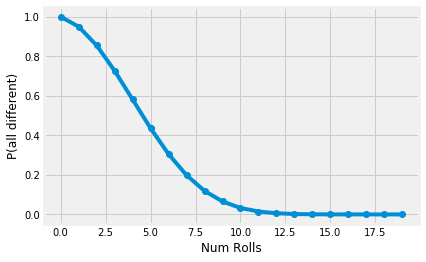

In [ ]:
# plt is a data plotting library that we will discuss in a later lecture.
plt.plot(xs, ys, 'o-')
plt.xlabel("Num Rolls")
plt.ylabel('P(all different)')

In [ ]:
# Mysterious...
mystery = np.exp(-xs ** 2 / (2 * NUM_FACES))
mystery

array([1.00000000e+00, 9.75309912e-01, 9.04837418e-01, 7.98516219e-01,
       6.70320046e-01, 5.35261429e-01, 4.06569660e-01, 2.93757700e-01,
       2.01896518e-01, 1.31993843e-01, 8.20849986e-02, 4.85578213e-02,
       2.73237224e-02, 1.46253347e-02, 7.44658307e-03, 3.60656314e-03,
       1.66155727e-03, 7.28152539e-04, 3.03539138e-04, 1.20362805e-04])

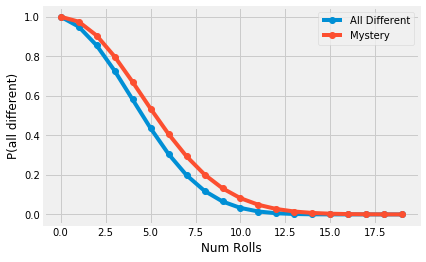

In [ ]:
# If you're curious, this is the exponential approximation for our probability:
# https://textbook.prob140.org/notebooks-md/15_04_Exponential_Distribution.html
plt.plot(xs, ys, 'o-', label="All Different")
plt.plot(xs, mystery, 'o-', label="Mystery")
plt.xlabel("Num Rolls")
plt.ylabel('P(all different)')
plt.legend()

### Question 2

To test your understanding of Numpy we will work through some basic image exercises.  In the process we will explore  visual perception and color.

Images are 2-dimensional grids of pixels. Each pixel contains 3 values between 0 and 1 that specify how much red, green, and blue go into each pixel.

We can create images in NumPy:

<img src="launch.png" width="40px" align="left" float="left"/>

In [ ]:
simple_image = np.array([
    [[  0,   0, 0], [0.5, 0.5, 0.5], [1.0, 1.0, 1.0]], # Grayscale pixels
    [[1.0,   0, 0], [  0, 1.0,   0], [  0,   0, 1.0]], # Pure RGB pixels
    [[0.5, 0.5, 0], [0.5,   0, 0.5], [  0, 0.5, 0.5]], # Blend of 2 colors
])
simple_image

array([[[0. , 0. , 0. ],
        [0.5, 0.5, 0.5],
        [1. , 1. , 1. ]],

       [[1. , 0. , 0. ],
        [0. , 1. , 0. ],
        [0. , 0. , 1. ]],

       [[0.5, 0.5, 0. ],
        [0.5, 0. , 0.5],
        [0. , 0.5, 0.5]]])

We can then use the [`scikit-image`](http://scikit-image.org/) library to display an image:

<img src="launch.png" width="40px" align="left" float="left"/>

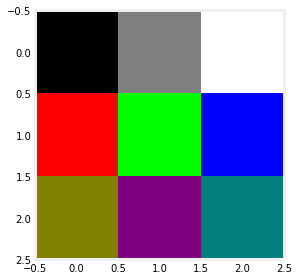

In [ ]:
# Curious how this method works? Try using skimage.io.imshow? to find out.
# Or, you can always look at the docs for the method.
skimage.io.imshow(simple_image)
plt.grid(False) # Disable matplotlib's grid lines

We can read in image files using the `skimage.io.imread` method.  

*Note that in many image formats (e.g., JPEG) image values are numbers between 0 and 255 corresponding to a byte.  Therefore we divide each pixel value by 255 to obtain numbers between 0 and 1.*  

<img src="launch.png" width="40px" align="left" float="left"/>

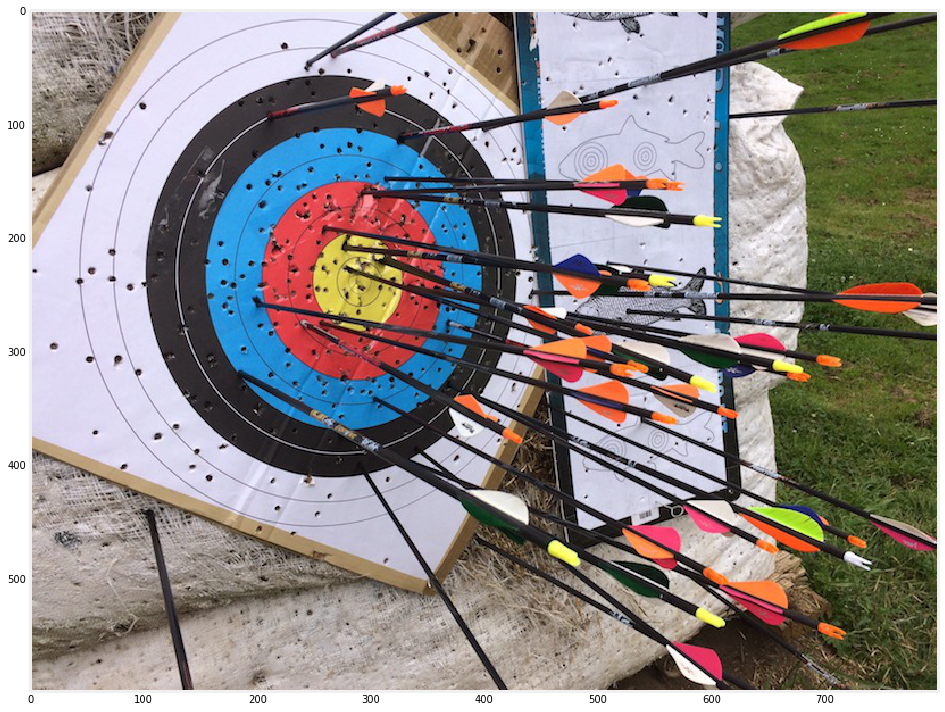

In [ ]:
plt.figure(figsize=(20,10))

# Some image files (including .jpg files) have pixel values in between
# 0 and 255 when read. We divide by 255 to scale the values between 0 and 1:
pic = skimage.io.imread('target.jpg')/255


skimage.io.imshow(pic)
plt.grid(False) # Disable matplotlib's grid lines

#### Question 2a

Complete the following block of code to plot the Red, Green, and Blue color channels separately.  The resulting images should appear in black and white.

* **Hint:** `pic[:, :, 0]` will slice the image to extract the red color channel.  Plotting the resulting matrix will generate a black and white picture.*

<img src="code.png" width="75px" align="left"/> 


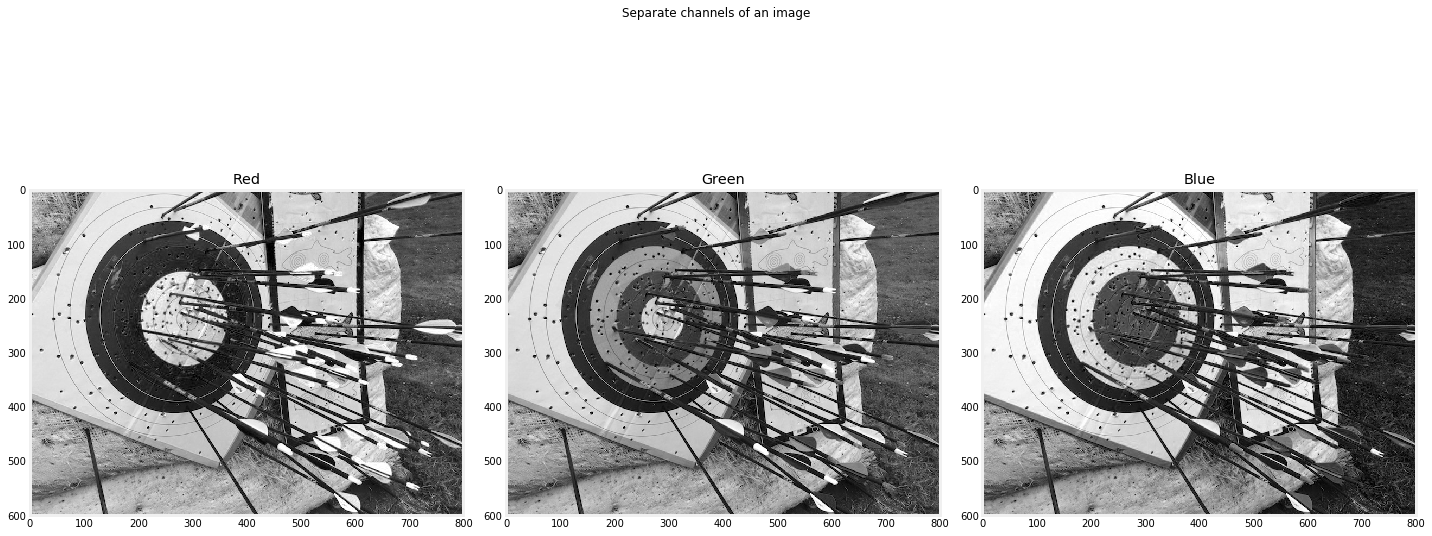

In [ ]:
plt.figure(figsize=(20,10)) 
channel_names = ["Red", "Green", "Blue"]

# Loop through index of each channel
for channel in range(3):
    # Make a subplot
    plt.subplot(1,3,channel+1)
    # FINISH THE CODE
    
    # Hint: you should write one line of code that calls
    # `skimage.io.imshow`
    
    skimage.io.imshow(pic[:, :, channel])
    
    # YOUR CODE HERE
#     raise NotImplementedError()
    
    plt.grid(False)
    plt.title(channel_names[channel])
    plt.suptitle("Separate channels of an image")

#### Question 2b

Surprisingly the human eye doesn't see all colors equally.  To demonstrate this we will study how blurring color channels affects image appearance.  First, we will try to blur each color channel individually.  Complete the following block of code using the `skimage.filters.gaussian` blurring function (read the docs) to render a blurry black and white image for each of the color channels.  You should set the standard deviation of the Gaussian blurring kernel `sigma` to 10.

<img src="code.png" width="75px" align="left"/> 

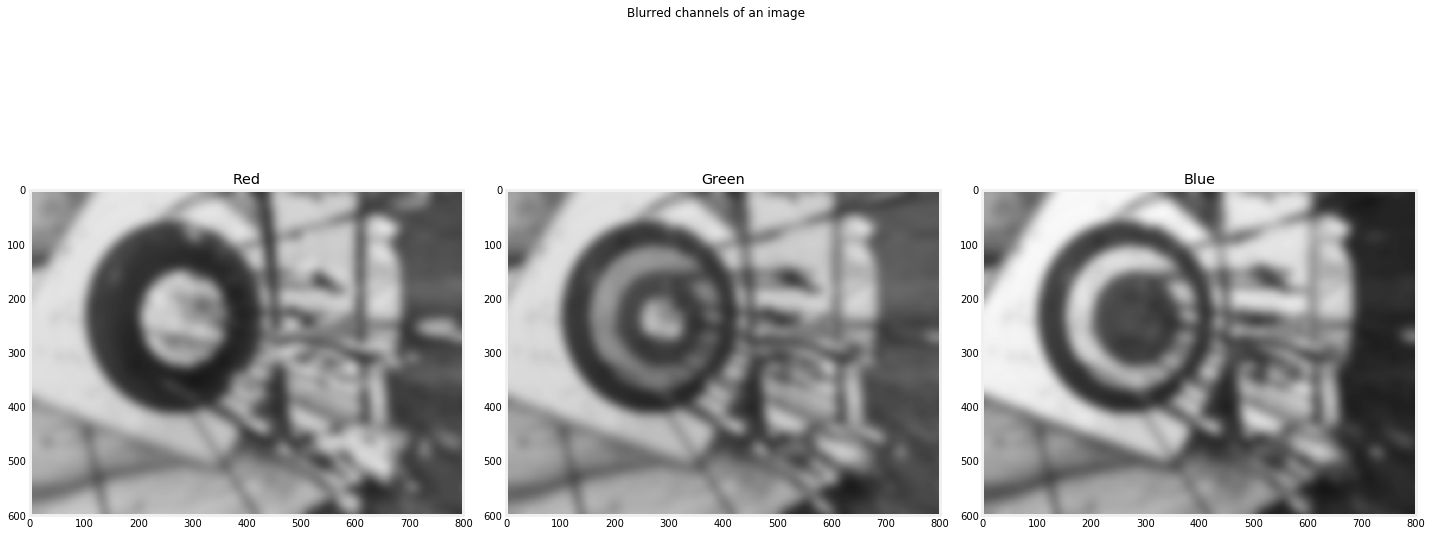

In [ ]:
plt.figure(figsize=(20,10))

sigma = 10

# Loop through index of each channel
for channel in range(3):
    # Make a subplot
    plt.subplot(1,3,channel+1)
    # FINISH THE CODE 
    blurried_img = skimage.filters.gaussian(pic[:, :, channel], sigma=sigma)
    skimage.io.imshow(blurried_img)
    # YOUR CODE HERE
    
#     raise NotImplementedError()
    
    plt.grid(False)
    plt.title(channel_names[channel])
    plt.suptitle("Blurred channels of an image")

#### Question 2c

Using the following block of code:

```python
pic_copy = pic.copy()
pic_copy[:, :, channel] = ...
skimage.io.imshow(pic_copy)
```

we can replace a color channel with a different black and white image.  Complete the following block of code to render three different versions of the full color image with just one of the channels blurred.

<img src="code.png" width="75px" align="left"/> 

In [ ]:
plt.figure(figsize=(20,10))

sigma = 10

# Loop through index of each channel
for channel in range(3):
    # Make a subplot
    plt.subplot(1,3,channel+1)
    # FINISH THE CODE
    pic_copy = pic.copy()
    pic_copy[:, :, channel] = skimage.filters.gaussian(pic_copy[:, :, channel], sigma=sigma)
    skimage.io.imshow(pic_copy)
    # YOUR CODE HERE
#     raise NotImplementedError()
    
    plt.grid(False)
    plt.title(channel_names[channel])
    plt.suptitle("Blurred channels of an image")

In [ ]:
assert True # We're giving you this free point for 2a, 2b, 2c, but please do the question

#### Question 2d

Each image should appear slightly different.  Which one is the blurriest and which is the sharpest?  Write a short description of what you see in the cell below.


<img src="write.png" width="120px" align="left" float="left"/> *This icon means you will need to write in text response in the cell below using English.

**Hint:** I observe ... .  On possible explanation for this is ... .


I find the second picture blurriest and the first sharpest. One possible explanation for this is people's eyes are most sensitive to green light and least to red light. Thus, when green channel of a picture is blurred, people will easily tell the difference between blurred picture and the original one.

## 3: Debugging and Testing

In this course, you will write a significant amount of code and inevitably encounter some bugs in the process. You should feel comfortable reading stack traces, debugging erroneous code, and testing the code you write.

Regarding debugging methods, we will be using `pdb` (Python Debugger), linked here: https://docs.python.org/3/library/pdb.html. `pdb` provides an interactive debugger for python programs and works within a notebook. It has a lot of useful features such as setting conditional breakpoints and single stepping at the source line level. 

We will only be enforcing `pdb` on this first assignment. You can still use print statements or other methods of your choice on other assignments, although when the code becomes increasingly complex you may find it harder to debug without `pdb`. 

Please walk through the `debugging.ipynb` before proceeding.

### Question 3
The following blocks of code contains some errors. Find the bug and fix it in the same block so that the function does what it is expected to do. Feel free to create new cells to debug and test your code. Once you are confident that your code works, change the _debug to _fixed to run our tests.

* **Hint:** Try to use array operations to simplify your code.

#### Question 3a
<img src="code.png" width="75px" align="left"/> 

In [ ]:
def multiply_list_debug(some_list, multiplier):
    """
    Given a list and a multiplier, return a list containing each element in the list multiplied by 
    the multiplier. 
    You may assume that the lists are well formed and not nested more than once, 
    ie: 
        [[1,2,3],[4,5,6]] is valid since it is nested once and each nested list 
            is of the same type and length,
        [[1,2,3,[4,5,6]] is not valid  since it is nested more than once and 
            each nested list is not of same type
    Args:
        some_list: a list of integers that may or may not be nested
    Returns:
        A list (or hint: array) containing each element in the list multipled by the multiplier
    e.g.
    [1,2,3], 5 should return [5,10,15]
    [[1,2,3], [4,5,6], [7,8,9]], 0.5 should return [[0.5,1,1.5],[2,2.5,3],[3.5,4,4.5]]
    """
    some_list_multiplied = some_list * multiplier
    return some_list_multiplied

In [2]:
import pdb
def multiply_list_fixed(some_list, multiplier):
    # YOUR CODE HERE
#     pdb.set_trace()
    return np.array(some_list) * multiplier
#     raise NotImplementedError()

In [3]:
multiply_list_fixed([1, 2, 3], 5)

array([ 5, 10, 15])

In [4]:
assert np.array_equal(multiply_list_fixed([1,2,3],5), [5,10,15])
assert np.array_equal(multiply_list_fixed([[1,2,3], [4,5,6], [7,8,9]], 0.5), [[0.5,1,1.5],[2,2.5,3],[3.5,4,4.5]])

#### Question 3b
<img src="code.png" width="75px" align="left"/> 

In [ ]:
def find_all_under_10_debug(some_list):
    """
    Given a list, return a list containing all elements that are strictly less than 10.
    You may assume that the lists are well formed and not nested more than once, 
    ie: 
        [[1,2,3],[4,5,6]] is valid since it is nested once and each nested list 
            is of the same type, 
        [[1,2,3,[4,5,6]] is not valid  since it is nested more than once and 
            each nested list is not of same type
    Args:
        some_list: a list of integers that may or may not be nested
    Returns:
        A list (or array) of all elements that are less than 10
    e.g.
    [1,2,...,20] should return [1,2,...,9]
    [[1,2,3], [4,5,6], [20,21,22]] should return [1,2,3,4,5,6]
    """
    all_under_10 = np.array([])
    for item in some_list:
        if item < 10:
            np.append(all_under_10,item)
    return all_under_10

In [5]:
def find_all_under_10_fixed(some_list):
    # YOUR CODE HERE
#     pdb.set_trace()
    all_under_10 = np.array(some_list)
    ind = all_under_10 < 10
#     print(ind)
#     print(all_under_10[ind])
    return all_under_10[ind]
#     raise NotImplementedError()


In [6]:
find_all_under_10_fixed([[1,2,3], [4,5,6], [20,21,22]])

array([1, 2, 3, 4, 5, 6])

In [7]:
assert np.array_equal(find_all_under_10_fixed(np.arange(20)), np.arange(10))
assert np.array_equal(find_all_under_10_fixed([[1,2,3], [4,5,6], [20,21,22]]),[1,2,3,4,5,6])

#### Question 3c
<img src="code.png" width="75px" align="left"/> 

In [ ]:
def cat_debug(cat_data):
    """
    Given a 2d array containing cat names and weights, find the cats that weigh less than 10 lbs 
    and return a 2d array of those cats after adding 3 lbs to their weights.
    Args:
        cat_data: a 2d array containing cat names and their corresponding weights
    Returns:
        A 2d list (or array) of cats less than 10 lbs and their weights + 3 lbs
    e.g.
    [['Jordan',8],['Michael',11],['Peter', 7]] should return [['Jordan',11],['Peter', 10]]
    
    Hint: What happens when a list or array contains data of multiple types?
    Hint: checkout arr.astype for type casting
    """
    list_of_cats = []
    for cat in cat_data:
        if cat[1] < 10:
            list_of_cats.append(cat)
    for cat in list_of_cats:
        cat = cat + 3
    return list_of_cats

In [ ]:
# cat = np.array([['Jordan',8],['Michael',11],['Peter', 7]])
# cat_debug(cat)

In [8]:
def cat_fixed(cat_data):
    # YOUR CODE HERE
    # Method 1
#     list_of_cats = []
#     for cat in cat_data:
#         if int(cat[1]) < 10:
#             list_of_cats.append(cat)
#     for cat in list_of_cats:
#         cat[1] = int(cat[1]) + 3
#     return list_of_cats
    
    # Method 2
    cat = np.array(cat_data)
    ind = cat[:, 1].astype(np.int) < 10
    weight_less_10 = cat[ind]
    weight_less_10[:, 1] = weight_less_10[:, 1].astype(np.int) + 3
    return weight_less_10

#     raise NotImplementedError()

In [9]:
cat_data = np.array([['Jordan',8],['Michael',11],['Peter', 7]])
assert np.array_equal(cat_fixed(cat_data), [['Jordan',11],['Peter', 10]])

---
## 4: Multivariable Calculus, Linear Algebra, and Probability

The following questions ask you to recall your knowledge of multivariable calculus, linear algebra, and probability. We will use some of the most fundamental concepts from each discipline in this class, so the following problems should at least seem familiar to you.

For the following problems, you should use LaTeX to format your answer. If you aren't familiar with LaTeX, not to worry. It's not hard to use in a Jupyter notebook. Just place your math in between dollar signs:

\\$ f(x) = 2x \\$ becomes $ f(x) = 2x $.

If you have a longer equation, use double dollar signs:

\\$\\$ \sum_{i=0}^n i^2 \\$\\$ becomes:

$$ \sum_{i=0}^n i^2 $$.

Here are some handy notation:

| Output | Latex   |
|:--|:--|
| $$x^{a + b}$$  | `x^{a + b}` |
| $$x_{a + b}$$ | `x_{a + b}` |
| $$\frac{a}{b}$$ | `\frac{a}{b}` |
| $$\sqrt{a + b}$$ | `\sqrt{a + b}` |
| $$\{ \alpha, \beta, \gamma, \pi, \mu, \sigma^2  \}$$ | `\{ \alpha, \beta, \gamma, \pi, \mu, \sigma^2  \}` |
| $$\sum_{x=1}^{100}$$ | `\sum_{x=1}^{100}` |
| $$\frac{\partial}{\partial x} $$ | `\frac{\partial}{\partial x} ` |
| $$\begin{bmatrix} 2x + 4y \\ 4x + 6y^2 \\ \end{bmatrix}$$ | `\begin{bmatrix} 2x + 4y \\ 4x + 6y^2 \\ \end{bmatrix}`|



[For more about basic LaTeX formatting, you can read this article.](https://www.sharelatex.com/learn/Mathematical_expressions)

If you have trouble with these topics, we suggest reviewing:

- [Khan Academy's Multivariable Calculus](https://www.khanacademy.org/math/multivariable-calculus)
- [Khan Academy's Linear Algebra](https://www.khanacademy.org/math/linear-algebra)
- [Khan Academy's Statistics and Probability](https://www.khanacademy.org/math/statistics-probability)

### Question 4

#### Question 4a

Recall that summation (or sigma notation) is a way of expressing a long sum in a concise way.  Let $a_1, a_2, ..., a_n \in \mathbb{R}$ and $x_1, x_2, ..., x_n \in \mathbb{R}$ be collections of real numbers.  When you see $x_i$, you can think of the $i$ as an index for the $i^{th}$ $x$.  For example $x_2$ is the second $x$ value in the list $x_1, x_2, ..., x_n$.  We define sigma notation as follows:

$$ \sum_{i=1}^n a_i x_i = a_1 x_1 + a_2 x_2 + ... + a_n x_n $$
	
We commonly use sigma notation to compactly write the definition of the arithmetic mean (commonly known as the ``average``):
	
$$ \bar{x} = \dfrac{1}{n} \left(x_1 + x_2 + ... + x_n \right) = \dfrac{1}{n} \sum_{i=1}^{n} x_i $$
	
**For each of the statements below, either prove that it is true by using definitions or show that it is false by providing a counterexample.**

**Note:** <img src="write.png" width="120px" align="left" float="left"/> *This icon means you will need to write in text response in the cell below using English + $\LaTeX$.

#### Statement I
$\dfrac{\sum_{i=1}^{n} a_i x_i}{\sum_{i=1}^{n} a_i} = \sum_{i=1}^n x_i$ 

<img src="write.png" width="75px" align="left" float="left"/>

**Counterexample**: assume $n=2, a_1=1, a_2=2, x_1=3, x_2=4$, thus, $\dfrac{\sum_{i=1}^{n} a_i x_i}{\sum_{i=1}^{n} a_i} = \dfrac{a_1x_1+a_2x_2}{a_1+a_2} = \dfrac{3 + 8}{1 + 2} = \dfrac{11}{3}\neq \sum_{i=1}^n x_i = 3 + 4 = 7$

#### Statement II
$\sum_{i=1}^{n} x_1 = nx_1$

<img src="write.png" width="75px" align="left" float="left"/>

**Proof**: $\sum_{i=1}^{n} x_1 = \underbrace{x_1 + x_1 + \dots + x_1}_{\text{n in total}} = nx_1$

#### Statement III
$\sum_{i=1}^{n} a_3 x_i = n a_3 \bar{x} $

<img src="write.png" width="75px" align="left" float="left"/>

**Proof**:  $\sum_{i=1}^{n} a_3 x_i = a_3 \sum_{i=1}^{n} x_i = a_3 \cdot n \cdot \dfrac{1}{n} \left(x_1 + x_2 + ... + x_n \right) = a_3 \cdot n \cdot \bar{x} = na_3\bar{x}$



#### Statement IV
$\sum_{i=1}^{n} a_i x_i = n \bar{a} \bar{x} $

<img src="write.png" width="75px" align="left" float="left"/>

**Counterexample**: assume $n=2, a_1=1, a_2=2, x_1=1, x_2=2$, thus, $\sum_{i=1}^{n} a_i x_i = 1 + 4 \neq n \bar{a} \bar{x} = 2 \cdot \dfrac{3}{2} \cdot \dfrac{3}{2} = \dfrac{9}{2}$

**Note:**

We can also generalize the summation concepts above to multiple indices: consider an array of values $x_{ij}$
	
$$ \begin{bmatrix} x_{1,1} & x_{1, 2} & ... & x_{1, n} \\ 
x_{2,1} & x_{2, 2} & ... & x_{2, n} \\ 
\vdots  & \vdots   & \ddots & \vdots   \\ 
x_{n,1} & x_{n, 2} & ... & x_{n, n} \\ 
\end{bmatrix} $$
	
By convention, the first index refers to the row and the second index references the column.  e.g. $x_{2, 4}$ is the value in the second row and the fourth column.  For multi-indexed arrays like this, we can write down the sum of all the values by evoking sigma notation multiple times:

\begin{align*} 
	\sum_{i=1}^{n} \sum_{j=1}^{n} x_{i,j}
	&= \sum_{i=1}^{n} \left(\sum_{j=1}^{n} x_{i,j} \right) \\
	&= \sum_{i=1}^{n} \left(x_{i,1} + x_{i,2} + ... + x_{i,n}\right) \\
	&= \sum_{i=1}^{n} x_{i,1} + \sum_{i=1}^{n} x_{i,2} + ... + \sum_{i=1}^{n} x_{i,n} \\
	&= \left(x_{1,1} + x_{1,2} + ... + x_{1,n}\right) + \left(x_{2,1} + x_{2,2} + ... + x_{2,n}\right) + ... +  \left(x_{n,1} + x_{n,2} + ... + x_{n,n}\right) \\
	&= x_{1,1} + x_{1,2} + ... + x_{1,n} + x_{2,1} + x_{2,2} + ... + x_{2,n} + ... + ... + x_{n,1} + x_{n,2} + ... + x_{n,n}
\end{align*}
	

#### Question 4b
Manipulate the following expression to show that it can be written as a sum of powers of $x$ (e.g. $3x + 5x^2 + 8x^3$):

$$
	\ln \left( 3 e^{2  x} e^{\frac{1}{x^2}} \right)
$$

<img src="write.png" width="120px" align="left" float="left"/> 

$\ln \left( 3 e^{2  x} e^{\frac{1}{x^2}} \right) = \ln 3 + \ln \left( e^{2x} \right) + \ln \left( e^{\frac{1}{x^2}} \right) = \ln3 + 2x + \dfrac{1}{x^2}$

#### Question 4c


Suppose we have the following scalar-valued function on $x$ and $y$:

$$ f(x, y) = x^2 + 4xy + 2y^3 + e^{-3y} + \ln(2y) $$

Compute the partial derivative with respect to $x$.

<img src="write.png" width="120px" align="left" float="left"/> 

$\dfrac{\partial f(x, y)}{\partial x} = 2x + 4y$

Now compute the partial derivative of $f(x,y)$ with respect to $y$:

<img src="write.png" width="75px" align="left" float="left"/>

$\dfrac{\partial f(x, y)}{\partial y} = 4x + 6y^2 - 3e^{-3y} + \dfrac{1}{y}$

#### Question 4d

Find the value(s) of $x$ which minimize the expressions below. Justify why it is the minimum.

#### Part A
$\sum_{i=1}^{10} (i - x)^2$

<img src="write.png" width="75px" align="left" float="left"/>
	

$x = 5.5$ minimize the expression

**Proof**: $\sum_{i=1}^{10} (i - x)^2 = \sum_{i=1}^{10} \left( i^2 - 2ix + x^2\right) = \sum_{i=1}^{10} i^2 - 2 \sum_{i=1}^{10} ix + \sum_{i=1}^{10} x^2 = 10 x^2 - 2x \cdot \sum_{i=1}^{10} i + \sum_{i=1}^{10} i^2 = 10 x^2 - 110x + 385$

Thus, $\dfrac{d f(x)}{d x} = 20x - 110, x = \dfrac{110}{20} = 5.5$ minimize the expression.

#### Part B

$\sin\left(\frac{x}{2}\right)\cos\left(\frac{x}{2}\right)$

<img src="write.png" width="75px" align="left" float="left"/>

$\sin\left(\frac{x}{2}\right)\cos\left(\frac{x}{2}\right) = \dfrac{1}{2} sinx$

Thus, $x = 2k\pi - \dfrac{\pi}{2} (k \in Z)$ minimize the expression.

#### Part C
$ \vert 5 - x \vert + \vert 3 - x \vert + \vert 1 - x \vert $

<img src="write.png" width="75px" align="left" float="left"/>

When $x \le 1$, $ \vert 5 - x \vert + \vert 3 - x \vert + \vert 1 - x \vert = (5-x) + (3-x) + (1-x) = 9 - 3x$,

thus, $x = 1$ minimize the experssion, the minimum value is 6.

When $1 \le x \le 3$, $ \vert 5 - x \vert + \vert 3 - x \vert + \vert 1 - x \vert = (5-x) + (3-x) + (x-1) = 7 - x$,

thus, $x = 3$ minimize the experssion, the minimum value is 4.

When $3 \le x \le 5$, $ \vert 5 - x \vert + \vert 3 - x \vert + \vert 1 - x \vert = (5-x) + (x-3) + (x-1) = x + 1$,

thus, $x = 3$ minimize the experssion, the minimum value is 4.

When $x \gt 5$, $ \vert 5 - x \vert + \vert 3 - x \vert + \vert 1 - x \vert = (x-5) + (x-3) + (x-1) = 3x - 9$,

thus, $x = 5$ minimize the experssion, the minimum value is 6.

Overall, the minimum value of $ \vert 5 - x \vert + \vert 3 - x \vert + \vert 1 - x \vert$ is 4 when $x = 3$.

#### Question 4e
Let $ \sigma(x) = \dfrac{1}{1+e^{-x}} $

#### Part A
Show that $\sigma(-x) = 1 - \sigma(x)$ where $\sigma(x) = \frac{1}{1+e^{-x}}$.


<img src="write.png" width="75px" align="left" float="left"/>

**Proof**: $\sigma(-x) = \dfrac{1}{1+e^{x}} = \dfrac{1 \cdot e^{-x}}{(1+e^{x}) \cdot e^{-x}} = \dfrac{e^{-x}}{e^{-x} + 1} = \dfrac{e^{-x} + 1 - 1}{e^{-x} + 1} = 1 - \dfrac{1}{e^{-x} +1} = 1 - \sigma(x)​$

#### Part B
Show that the derivative can be written as:
		
$$\frac{d}{dx}\sigma(x) = \sigma(x)(1 - \sigma(x)) $$


<img src="write.png" width="75px" align="left" float="left"/>

**Proof**: $\dfrac{d}{dx}\sigma(x) = - \dfrac{- e^{-x}}{(1 + e^{-x}) ^ 2} = \dfrac{e^{-x}}{(1 + e^{-x}) ^ 2} = \dfrac{e^{-x} \cdot e^x}{(1 + e^{-x}) \cdot e^x} \cdot \dfrac{1}{1 + e^{-x}} = \dfrac{1}{(1 + e^{-x})\cdot(1 + e^{x})} = \dfrac{1}{(1 + e^{-x})} \cdot \dfrac{1}{(1 + e^{x})}$

According to Question 4e Part A, $1 - \sigma(x) = \sigma(-x) = \dfrac{1}{1 + e^{-x}}$, thus, $\dfrac{1}{(1 + e^{-x})} \cdot \dfrac{1}{(1 + e^{x})} = \sigma(x)(1 - \sigma(x)) $

#### Question 4f
Write code to plot the function $f(x) = x^2$ and the derivative of $f$ evaluated at $x=8$ and $x=0$. 

Set the range of the x-axis to (-15, 15) and the range of the y axis to (-100, 300) and the figure size to (8,8).

Your resulting plot should look like this:

<img src="derivative.png" width="500px" align="center"/>

You should use the `plt.plot` function to plot lines. You may find the following functions useful:

- [`plt.plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [`plt.figure(figsize=..)`](https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib)
- [`plt.ylim(..)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylim.html)
- [`plt.axhline(..)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hlines.html)

<img src="code.png" width="75px" align="left"/>  

In [ ]:
def f(x):
    # YOUR CODE HERE
    return x ** 2

#     raise NotImplementedError()
    
def df(x):
    # YOUR CODE HERE
    return 2 * x

#     raise NotImplementedError()

def plot(f, df):
    # YOUR CODE HERE
    plt.figure(figsize=(8, 8))
    x = np.arange(-15, 16, 1)
    plt.xlim(-15, 15)
    plt.ylim(-100, 300)
    plt.plot(x, f(x))
    plt.plot(x, df(0) * (x - 0) + f(0))  # y = f'(x0)(x - x0) + f(x0)
    plt.plot(x, df(8) * (x - 8) + f(8))
    
#     raise NotImplementedError()

plot(f, df)

#### Question 4g
How can we interpret what the derivative of a function is using this plot?

<img src="write.png" width="75px" align="left"/> 


The derivative of a function is the slope of the tangent line to the graph of the function at that point.

#### Question 4h

Consider the following scenario:

Only $1\%$ of 40-year-old women who participate in a routine mammography test have breast cancer. $80\%$ of women who have breast cancer will test positive, but $9.6\%$ of women who don’t have breast cancer will also get positive tests. 

Suppose we know that a woman of this age tested positive in a routine screening. What is the probability that she actually has breast cancer?

**Hint:** Try to use Bayes' rule.

<img src="write.png" width="75px" align="left" float="left"/>

$A$ = has breast cancer, $B$ = tested positive.

$P(A | B) = \dfrac{P(A) \cdot P(B | A)}{P(B)} = \dfrac{P(A) \cdot P(B | A)}{P(A) \cdot P(B | A) + P(\bar{A}) \cdot P(B | \bar{A})} = \dfrac{0.01 \cdot 0.8}{0.01 \cdot 0.8 + 0.99 \cdot 0.096} = 7.76\%$

---
## 5: Basic Classification

Suppose we have a dataset containing two different classes, class A and class B, visualized below as purple dots and yellow dots. Let's implement basic K nearest neighbors classifier that classifies a point of interest by finding the K nearest neighbors. Recall the K-NN algorithm:

Given an example point to classify and the population we are querying from,

1. Find the distance between the example point and each
    point in the data set
    
2. Augment the data table with a column
    containing all the distances to the example point
    
3. Sort the augmented table in increasing order of the
    distances to the example point

4. Take the top k rows of the sorted table to get the K nearest neighbors

<img src="launch.png" width="40px" align="left" float="left"/>

In [ ]:
# Code to visualize the dataset
class_A = 0.5 * np.random.randn(100, 2)
class_B = 0.5 * np.random.randn(100, 2) + (2, 2)
class_A = np.append(class_A, np.zeros((100, 1)), axis=1)
class_B = np.append(class_B, np.ones((100,1)), axis=1)
population = np.append(class_A, class_B, axis=0)
plt.figure(figsize=(10,10))
plt.axis('equal')
plt.scatter(population[:,0], population[:,1], c=population[:,2])
plt.title('Two Class Dataset')

### Question 5

Fill in the functions `distance` and `getNeighbors` below, and test your code against the sklearn KNN classifier (write tests to see that your `getNeighbors` finds the same neighbors as the sklearn version). You must write at least 2 test cases with one example for each class.

Sklearn KNN: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

<img src="code.png" width="75px" align="left"/>  

In [ ]:
import operator
from sklearn.neighbors import KNeighborsClassifier
from typing import Union

def distance(p1: np.ndarray, p2: np.ndarray) -> Union[float, int]:
    """
    Return the euclidean distance between two points p1 and p2.
    
    Shape:
        - p1 and p2 are expected to have shape (1,2)
    
    >>> p1 = np.array([1.2, 2])
    >>> p2 = np.array([2, 2])
    >>> distance(p1, p2)
    0.8
    >>> distance(p1, p1)
    0 
    """
    # YOUR CODE HERE
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

#     raise NotImplementedError()

def get_neighbors(example: np.ndarray, population: np.ndarray, k: int=5):
    """
    For a given example, return the k nearest neighbors in the given population as a np.array.
    Each element of the population array should have the x-coordinate, the y-coordinate, and the class.
    
    Shape:
        - example is a point, with shape (1,1,2)
        - population is a 2d array with shape (N, 3). N is the total number of points.
          The first two column represent the x and y coordinates of the points. 
          The third column represent the class of each point. 
    
    >>> example = np.array([[1, 1]])
    >>> population = np.array([
            [0, 0, 0], # point at coordinate (0, 0) belongs to class 0 
            [100, 100, 1] # point at coordinate (100, 100) belongs to class 1
        ])
    >>> get_neighbors(example, population, k=1)
    np.array([
        [0, 0, 0] # point at coordinate (0, 0) is closet to example at (1, 1)
    ])
    """
    # YOUR CODE HERE
    all_pts = population[:, :2]  # (x, y) coordinates
    assert all_pts.shape == (population.shape[0] , 2)
    dist = np.array([distance(pt, example[0]) for pt in all_pts])
    ind = dist.argsort()  # get the distance index in ascending order
    k_neighbors = population[ind][:k,]  # select the first k elements
    return k_neighbors
    
    
#     raise NotImplementedError()

def test(example, population, k):
    """
    Compare your results against the sklearn KNN classifier.
    
    This function should create a sklearn KNeighborsClassifier and verify
    that get_neighbors method returns the same result as the KNeighborsClassifier.
    
    >>> example = np.array([[1, 1]])
    >>> population = np.array([
            [0, 0, 0], # point at coordinate (0, 0) belongs to class 0 
            [100, 100, 1] # point at coordinate (100, 100) belongs to class 1
        ])
    >>> # Provided get_neighbors implemented correctly
    >>> test(example, population, k=1)
    True
    """
    # YOUR CODE HERE
    X = population[:, :2]
    y = population[:, -1]
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    ind = clf.kneighbors(example, return_distance=False).flatten()
    print("index:")
    print(ind)
    
    k_neighbors_skl = population[ind]
    k_neighbors_own = get_neighbors(example, population, k)
    print("sklearn k neighbors: ")
    print(k_neighbors_skl)
    print("my implementation k neighbors: ")
    print(k_neighbors_own)
    
    vote_0 = sum(k_neighbors_own[:, 2] == 0)
    vote_1 = sum(k_neighbors_own[:, 2] == 1)
    my_ret = [1.] if vote_1 > vote_0 else [0.]
    skl_ret = clf.predict(example)
    print("my classfier result: ", my_ret)
    print("sklearn classifier result: ", skl_ret)
    
    return my_ret[0] == skl_ret[0]

    
    
#     raise NotImplementedError()

# YOUR TESTS HERE
example1 = np.array([[0.5, 1]])
population1 = np.array([
                [1, 1, 1],
                [2, 0, 1],
                [0, 0, 0],
                [0.5, 0.6, 0]])

test(example1, population1, k=2)

example2 = np.array([[0, 0]])
population2 = np.array([
                [10, 0, 1],
                [0, 10, 1],
                [1, 1, 0],
                [0, 1, 0],
                [0.5, 0, 0]])
test(example2, population2, k=2)

If your code is written properly, the two plots below should plot the point of interest, example_A and example_B, (red) and the K nearest neighbors (green). It should look SIMILAR to the two plots below.

<img src="class_A.png" width="400px" align="left"/>
<img src="class_B.png" width="400px" align="right"/>

<img src="launch.png" width="40px" align="left"/>

In [ ]:
example_A = [[0, 0]]
example_B = [[2, 2]]

neighbors_A = get_neighbors(example_A, population, k=10)
plt.figure(figsize=(10,10))
plt.axis('equal')
plt.scatter(population[:,0], population[:,1], c=population[:,2])
plt.scatter(neighbors_A[:,0], neighbors_A[:,1], c='g')
plt.scatter(0,0,c='r')
plt.title('Class A Example')
plt.show()

neighbors_B = get_neighbors(example_B, population, k=10)
plt.figure(figsize=(10,10))
plt.axis('equal')
plt.scatter(population[:,0], population[:,1], c=population[:,2])
plt.scatter(neighbors_B[:,0], neighbors_B[:,1], c='g')
plt.scatter(2,2,c='r')
plt.title('Class B Example')
plt.show()

## Submission

You're done!

Before submitting this assignment, ensure to:

1. Restart the Kernel (in the menubar, select Kernel->Restart & Run All)
2. Validate the notebook by clicking the "Validate" button

Finally, make sure to **submit** the assignment via the Assignments tab in Datahub